In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.

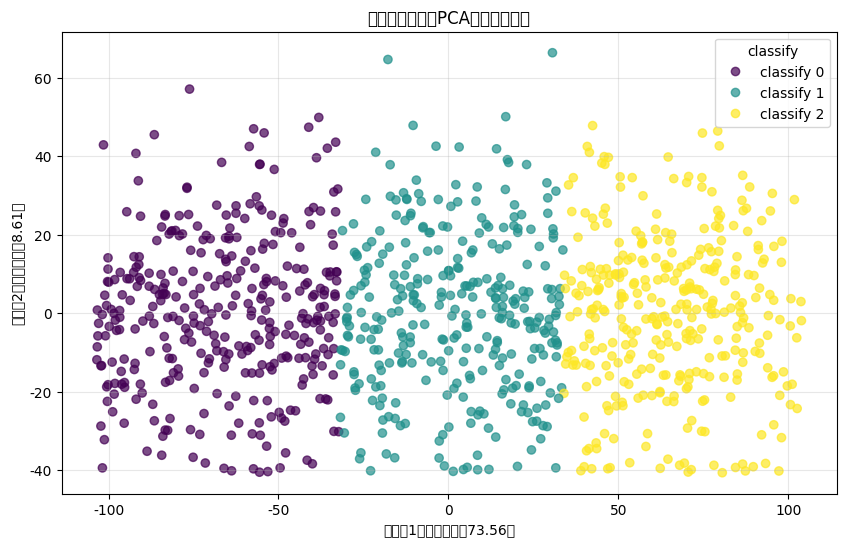

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
data = pd.read_csv("/kaggle/input/houkong-moai-machine-2/ecommerce_user_behavior.csv")
encoder = LabelEncoder()
data['browsing_time_distribution'] = encoder.fit_transform(data['browsing_time_distribution'])  # 如“白天”→0，“凌晨”→1
X = data.drop('user_id', axis=1) 
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)
y_pred=kmeans.predict(X)
cluster_labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0],  # 第一主成分
    X_pca[:, 1],  # 第二主成分
    c=cluster_labels,  # 颜色由聚类标签决定
    cmap='viridis',  # 颜色映射（可选：plasma、coolwarm等）
    alpha=0.7  # 点的透明度
)

# 添加图例（显示聚类标签0、1、2）
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[f'classify {i}' for i in range(3)],
    title='classify'
)

# 添加标题和坐标轴标签
plt.title('用户聚类结果（PCA降维可视化）')
plt.xlabel('主成分1（解释方差：{:.2f}）'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('主成分2（解释方差：{:.2f}）'.format(pca.explained_variance_ratio_[1]*100))
plt.grid(alpha=0.3)  # 添加网格线
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


各用户类型行为特征均值：
      session_count  purchase_frequency  return_rate
用户类型                                                
0             25.40                0.49         0.30
1             24.55                0.48         0.28
2             26.15                0.49         0.28


/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/4108508429.py:64: UserWarning: Glyph 22411 (\N{CJK UNIFIED

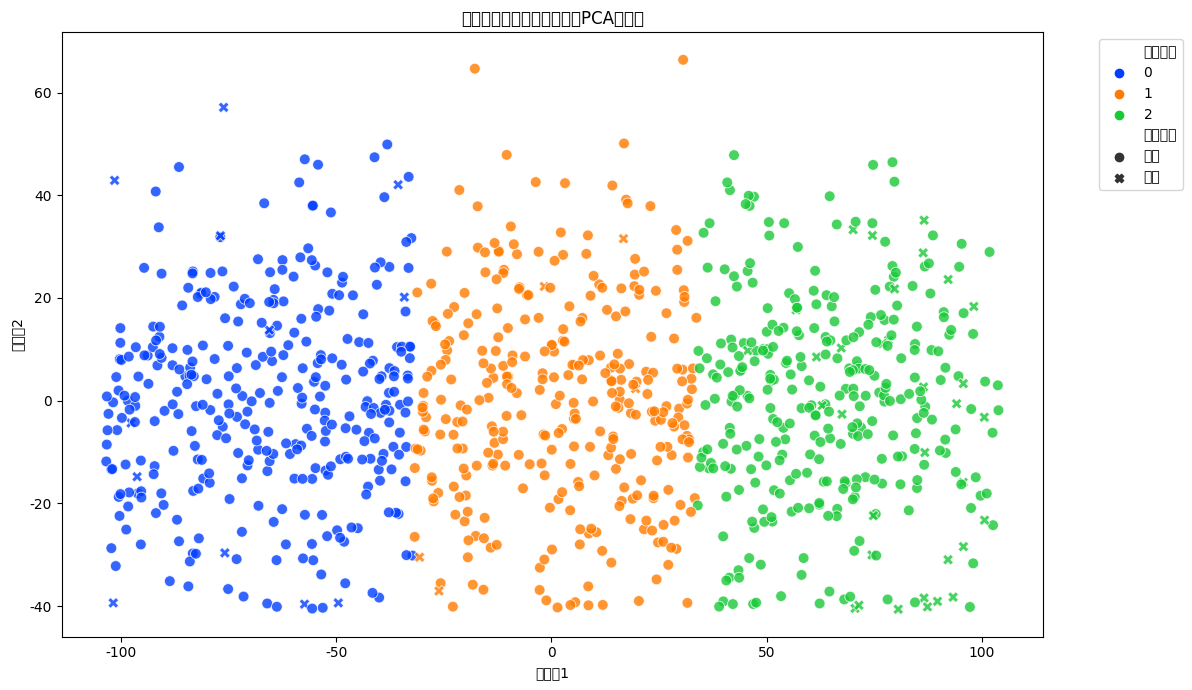

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# ======================
# 1. 数据加载与简单预处理
# ======================
data = pd.read_csv("/kaggle/input/houkong-moai-machine-2/ecommerce_user_behavior.csv")

# 编码类别特征（活跃时段：字符串→数值）
data['browsing_time_distribution'] = LabelEncoder().fit_transform(data['browsing_time_distribution'])

# 去掉用户ID（不参与聚类）
X = data.drop('user_id', axis=1)


# ======================
# 2. 聚类（挖掘用户行为模式）
# ======================
# 聚类并添加标签到原数据
data['用户类型'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# 打印各类型用户的行为均值（关键特征）
print("各用户类型行为特征均值：")
print(data.groupby('用户类型')[['session_count', 'purchase_frequency', 'return_rate']].mean().round(2))


# ======================
# 3. 异常检测（标记异常用户）
# ======================
# 用孤立森林检测异常（假设5%异常）
data['是否异常'] = IsolationForest(contamination=0.05, random_state=42).fit_predict(X)
data['是否异常'] = data['是否异常'].map({-1: '异常', 1: '正常'})  # 转换为文字标签


# ======================
# 4. 可视化（聚类+异常叠加）
# ======================
# PCA降维到2维（方便画图）
X_pca = PCA(n_components=2).fit_transform(X)
data['pca_x'] = X_pca[:, 0]
data['pca_y'] = X_pca[:, 1]

# 绘制散点图（颜色=用户类型，形状=是否异常）
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=data,
    x='pca_x', 
    y='pca_y',
    hue='用户类型',       # 颜色区分用户类型（0/1/2）
    style='是否异常',     # 形状区分异常（正方形=异常，圆形=正常）
    palette='bright',   # 更鲜艳的颜色
    s=60,               # 点大小
    alpha=0.8           # 透明度
)
plt.title('用户类型与异常行为分布（PCA降维）')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放右侧
plt.tight_layout()  # 调整布局避免遮挡
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_31/3410769601.py:80: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/3410769601.py:80: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/3410769601.py:80: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()  # 调整布局避免遮挡
/tmp/ipykernel_31/3410769601.py:80: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  plt.

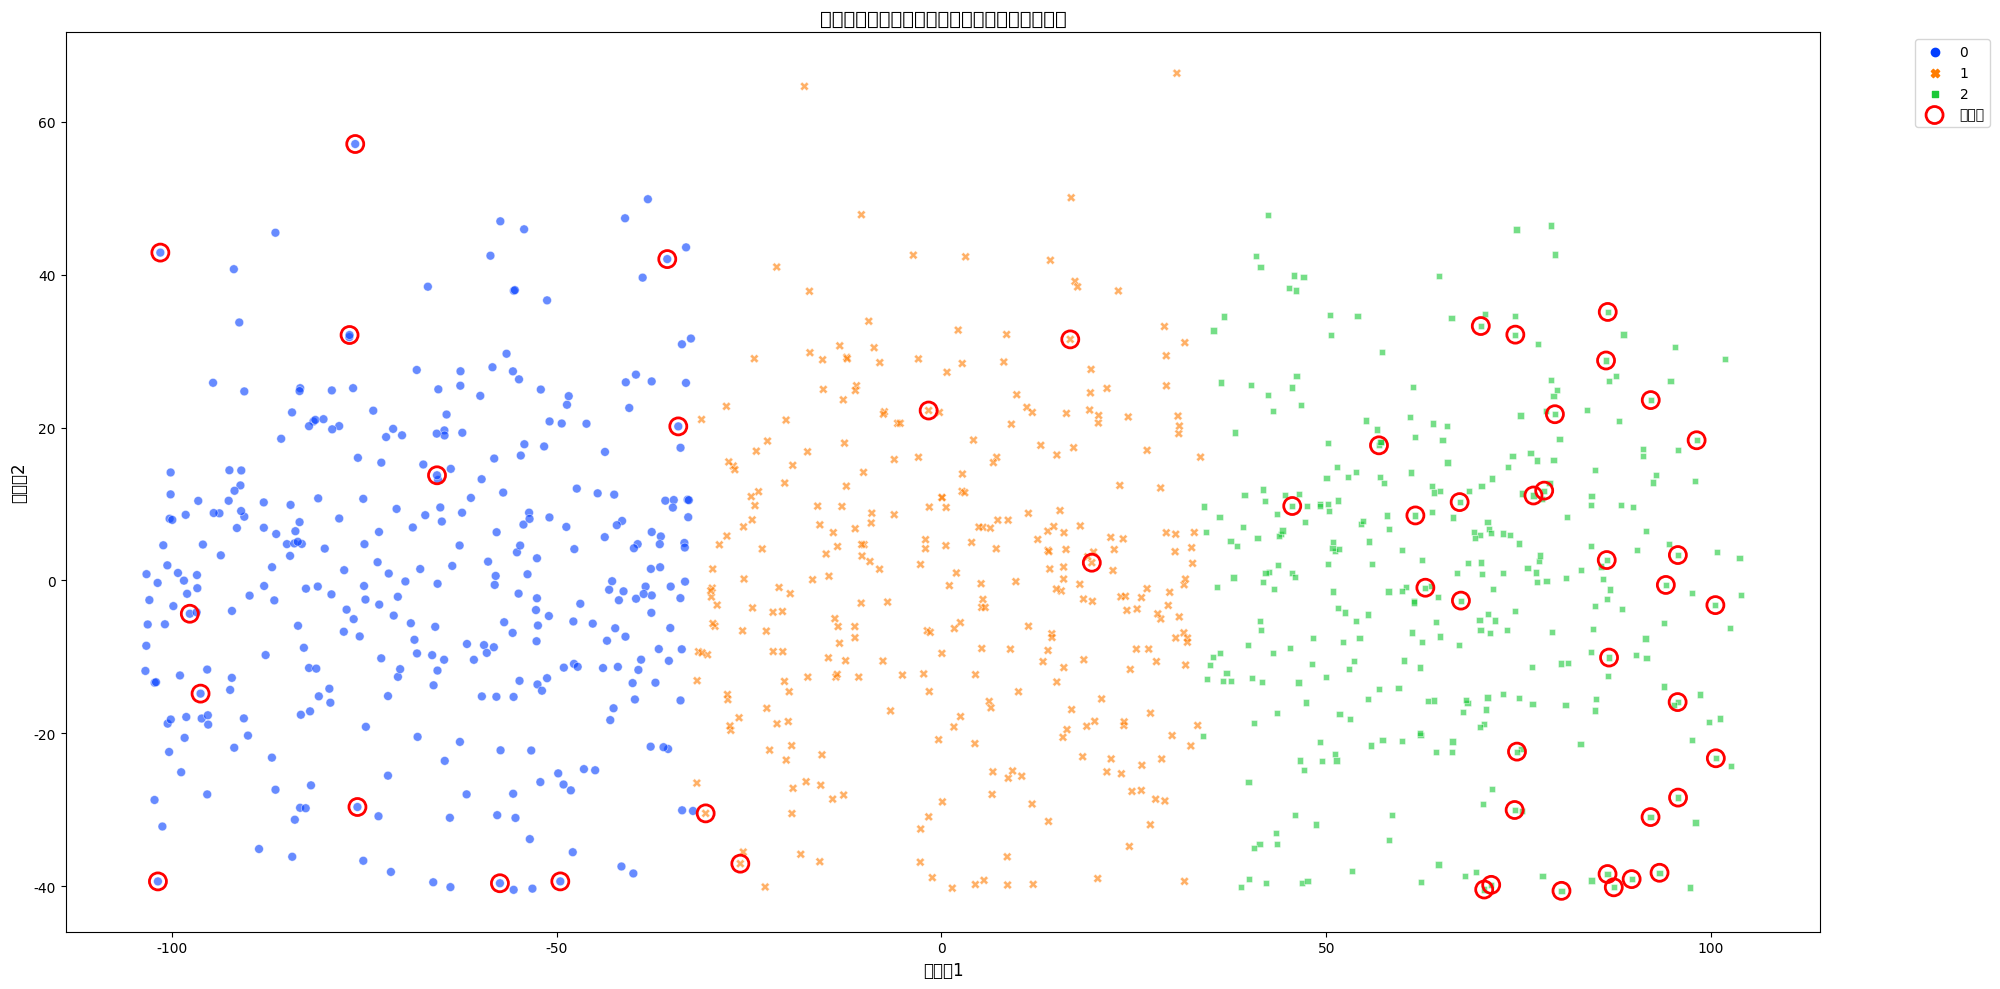

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# ======================
# 1. 数据加载与预处理
# ======================
data = pd.read_csv("/kaggle/input/houkong-moai-machine-2/ecommerce_user_behavior.csv")

# 编码类别特征（活跃时段）
data['browsing_time_distribution'] = LabelEncoder().fit_transform(data['browsing_time_distribution'])

# 去掉用户ID（不参与聚类）
X = data.drop('user_id', axis=1)


# ======================
# 2. 聚类与异常检测
# ======================
# 聚类并标记用户类型
data['用户类型'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# 检测异常（标记为“异常”或“正常”）
data['是否异常'] = IsolationForest(contamination=0.05, random_state=42).fit_predict(X)
data['是否异常'] = data['是否异常'].map({-1: '异常', 1: '正常'})  # 转换为文字标签


# ======================
# 3. PCA降维（用于可视化）
# ======================
X_pca = PCA(n_components=2).fit_transform(X)
data['pca_x'] = X_pca[:, 0]  # 主成分1（横轴）
data['pca_y'] = X_pca[:, 1]  # 主成分2（纵轴）


# ======================
# 4. 可视化（圈出异常点）
# ======================
plt.figure(figsize=(20,10))

# ----------------------
# 第一步：绘制所有用户的散点（基础层）
# ----------------------
sns.scatterplot(
    data=data,
    x='pca_x', 
    y='pca_y',
    hue='用户类型',       # 颜色区分用户类型
    style='用户类型',     # 形状也区分用户类型（可选）
    palette='bright',   # 鲜艳的颜色
    s=40,               # 基础点大小
    alpha=0.6           # 基础点透明度（更柔和）
)

# ----------------------
# 第二步：在异常点上叠加圆圈（突出显示）
# ----------------------
anomaly_data = data[data['是否异常'] == '异常']  # 筛选异常数据
plt.scatter(
    x=anomaly_data['pca_x'],  # 异常点的横轴坐标
    y=anomaly_data['pca_y'],  # 异常点的纵轴坐标
    s=150,                    # 圆圈大小（比基础点大）
    linewidths=2,             # 圆圈边框粗细
    edgecolors='red',         # 圆圈边框颜色（红色）
    facecolors='none',        # 圆圈内部无填充
    label='异常点'            # 图例标签
)

# ----------------------
# 第三步：添加图表标题、图例等
# ----------------------
plt.title('用户类型与异常行为分布（异常点用红圈标记）', fontsize=14)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放右侧
plt.tight_layout()  # 调整布局避免遮挡
plt.show()